## Supervised learning  Simple linear regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np

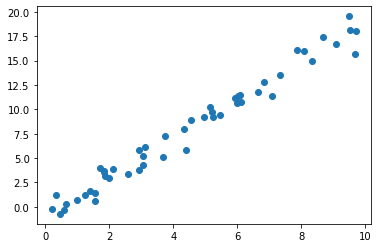

In [2]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [6]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
model.coef_

array([1.9776566])

In [10]:
model.intercept_

-0.9033107255311146

In [11]:
xfit = np.linspace(-1, 11)

In [12]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

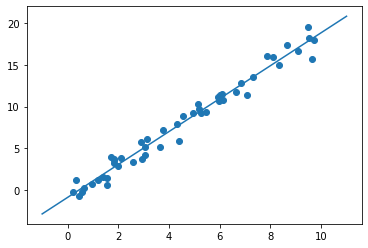

In [13]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

In [22]:
import seaborn as sns
iris = sns.load_dataset('iris')
import seaborn as sns
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']    
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_iris,y_iris,random_state=1)

In [23]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
y_model = model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_model)

0.9736842105263158

## Unsupervised learning example: Iris dimensionality

In [26]:
from sklearn.decomposition import PCA
model= PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

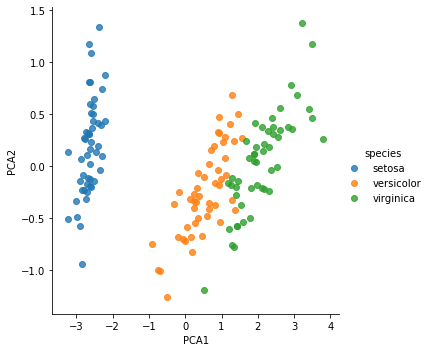

In [27]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

## Unsupervised learning: Iris clustering

In [29]:
from sklearn.mixture import GaussianMixture
model  = GaussianMixture(n_components=3,covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

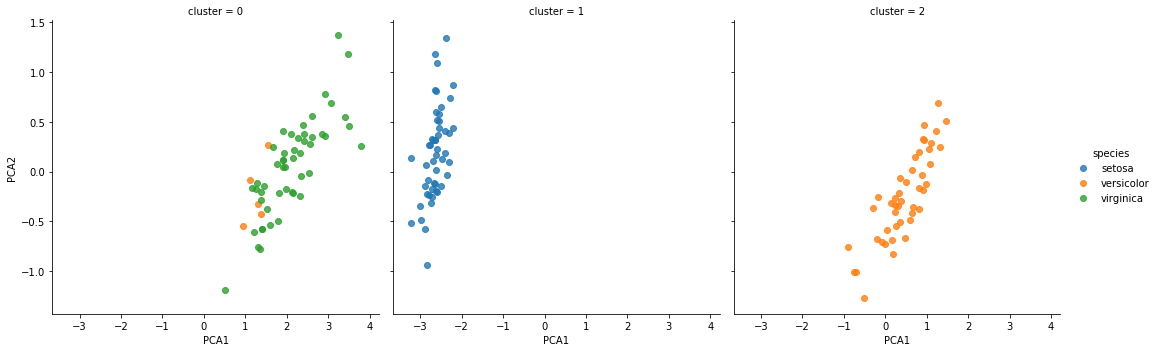

In [31]:
iris['cluster']=y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
 col='cluster', fit_reg=False);

## Application: Exploring Handwritten Digits

In [34]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

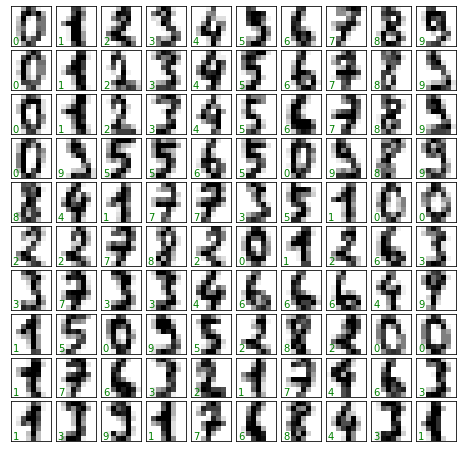

In [39]:
fig, axes = plt.subplots(10,10,figsize=(8,8),subplot_kw={'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap='binary',interpolation='nearest')
    ax.text(0.05,0.05,str(digits.target[i]),transform=ax.transAxes, color='green')

In [40]:
X = digits.data
X.shape

(1797, 64)

In [41]:
y = digits.target
y.shape

(1797,)

In [45]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

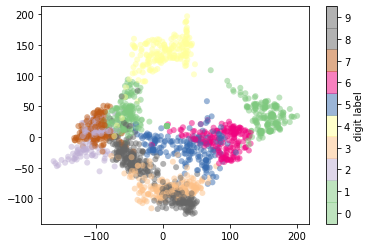

In [51]:
plt.scatter(data_projected[:,0],data_projected[:,1],c = digits.target,edgecolor='none',alpha=0.5,cmap=plt.cm.get_cmap('Accent', 10))
plt.colorbar(label='digit label',ticks=range(10))
plt.clim(-0.5,9.5)

# Classification on digits

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
y_model = model.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_model)

0.8333333333333334

In [55]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y_model)
mat

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  4,  0],
       [ 0,  7, 20,  2,  0,  0,  0,  0, 15,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  1,  5,  0],
       [ 0,  1,  0,  0, 31,  0,  0,  6,  0,  0],
       [ 0,  1,  0,  1,  0, 43,  0,  3,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 47,  0,  0],
       [ 0,  6,  0,  1,  0,  1,  0,  2, 38,  0],
       [ 0,  2,  0,  4,  1,  0,  0,  3,  7, 30]], dtype=int64)

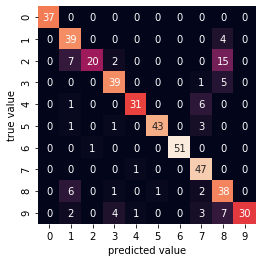

In [56]:
import seaborn as sns
sns.heatmap(mat,square=True,annot=True,cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

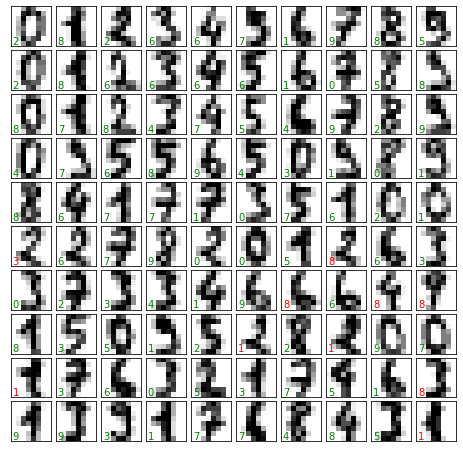

In [58]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
         transform=ax.transAxes,
     color='green' if (y_test[i] == y_model[i]) else 'red')